# Unit test

In [13]:
source("JupyterUtils.R")
source("C2ScoreHypothesisPresentation.R")

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        1076      120858      0.0700      0.1098      0.1673      0.2221      0.2711      1.9062      0.1702 


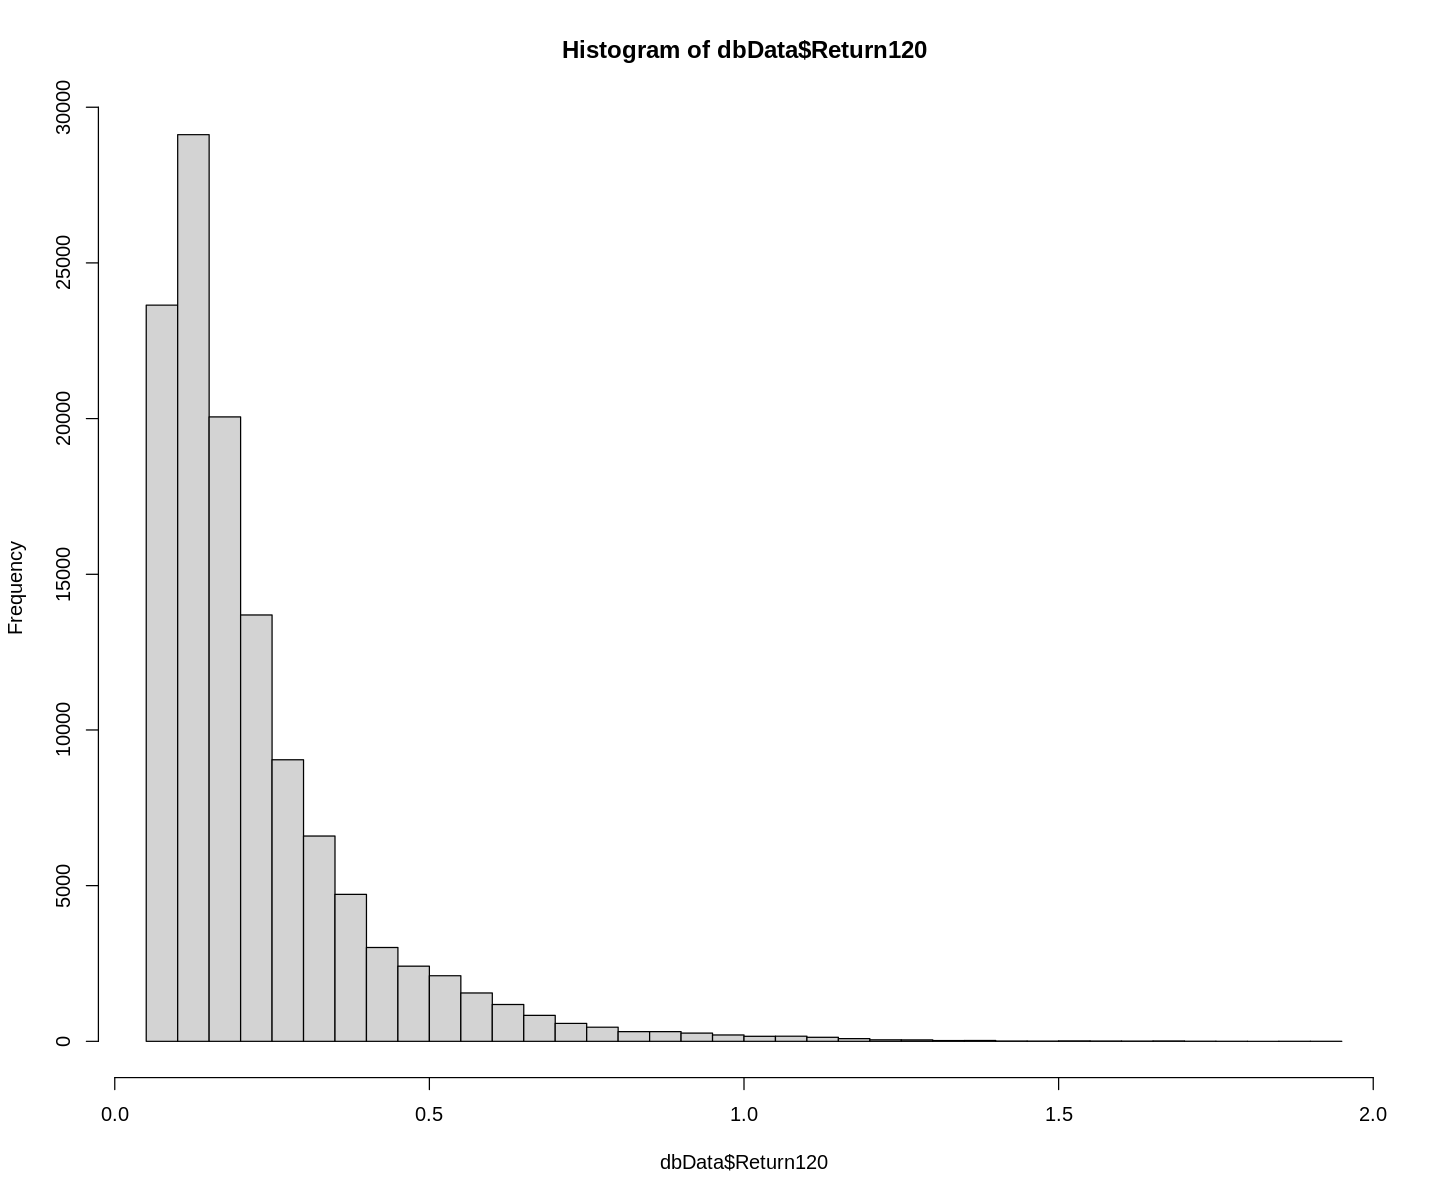

In [14]:
# Population average return after 120 days is 0.05312454
# Let's test 0.07
sql = "select * from ReturnsDataInIntervalsCleaned where Return120 > 0.07"
dbData = getC2ScoreDbData(sql)
overview(dbData,"Return120")
hist(dbData$Return120,breaks=50)

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        1075      120098      0.0700      0.1096      0.1664      0.2161      0.2679      0.9999      0.1525 


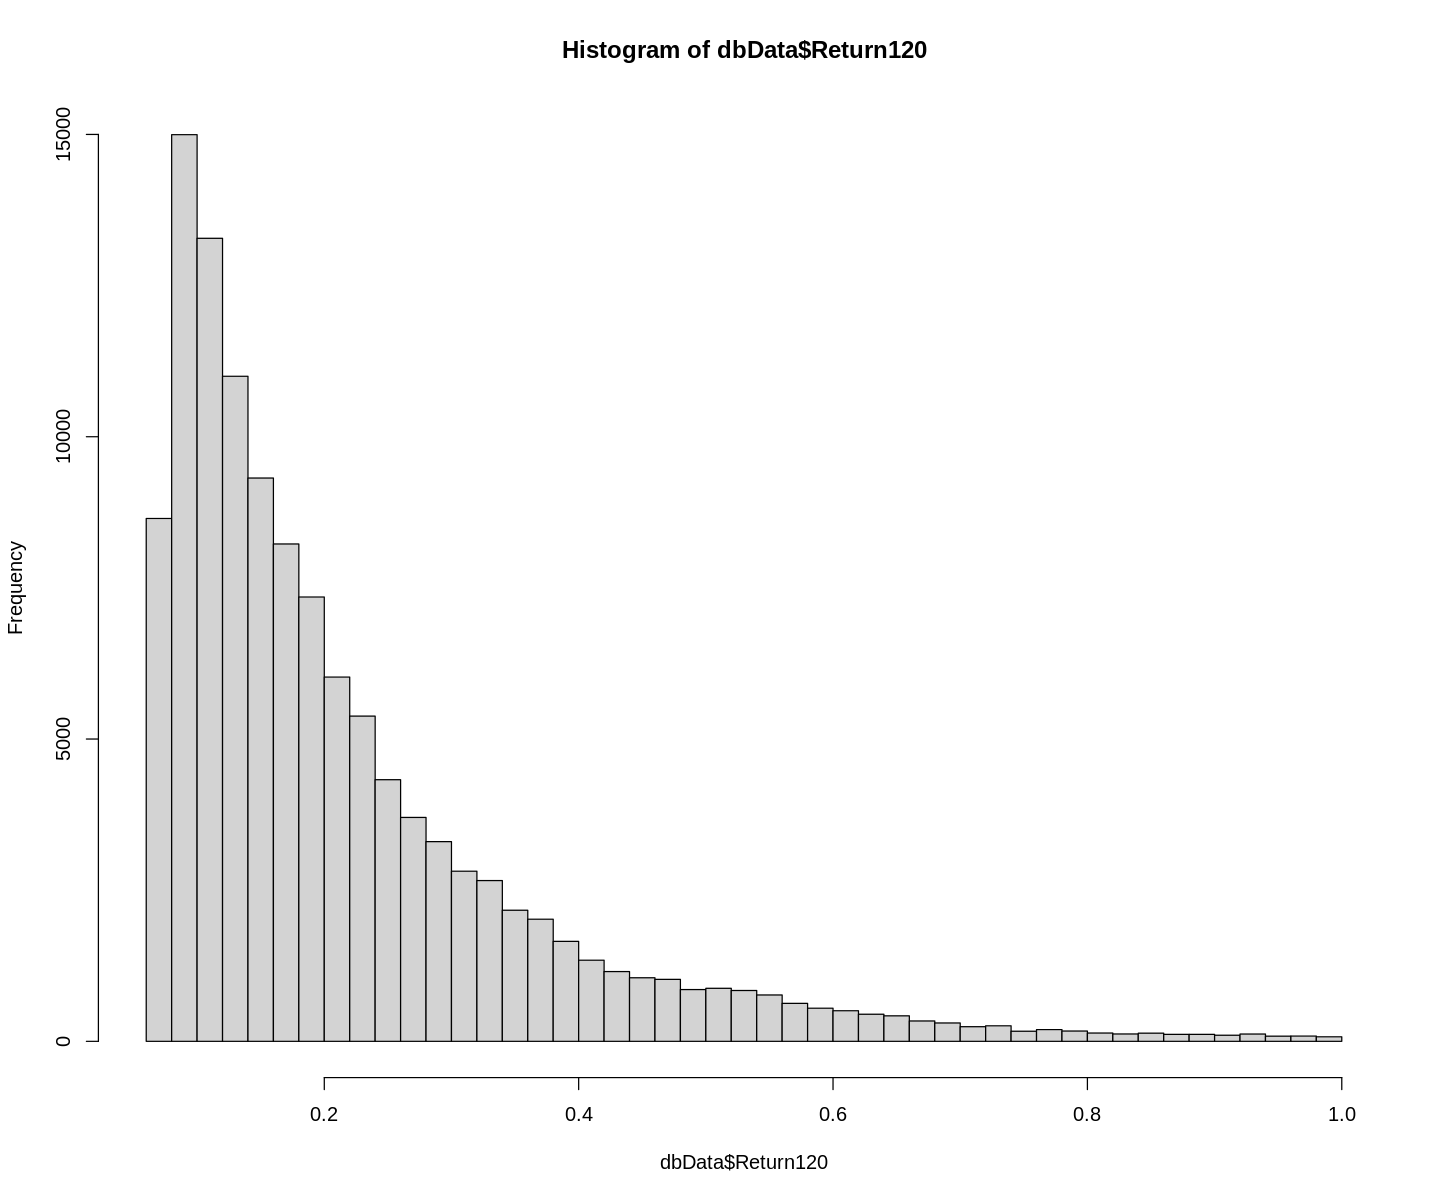

In [15]:
# More reasonable data: 0.7 - 1.0
sql = "select * from ReturnsDataInIntervalsCleaned where Return120 > 0.07 and  Return120 < 1"
dbData = getC2ScoreDbData(sql)
overview(dbData,"Return120")
hist(dbData$Return120,breaks=50)




We have calculated and stored the whole population statistics of strategies daily returns after 7, 14, ..., 360 days. Day after day. Now, we selected a particular statistics data (a sample) from the whole population. We want to know, if the average of returns of the sample is significantly higher than an average of returns of the whole population. A significance level is  0.05 .

The following table contains this hypothesis tests for defined stats intervals and all 7, 14, ..., 360 days time intervals.


Descriptive stats of all data selected in the experiment:
     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        1075      120098      0.0700      0.1096      0.1664      0.2161      0.2679      0.9999      0.1525 



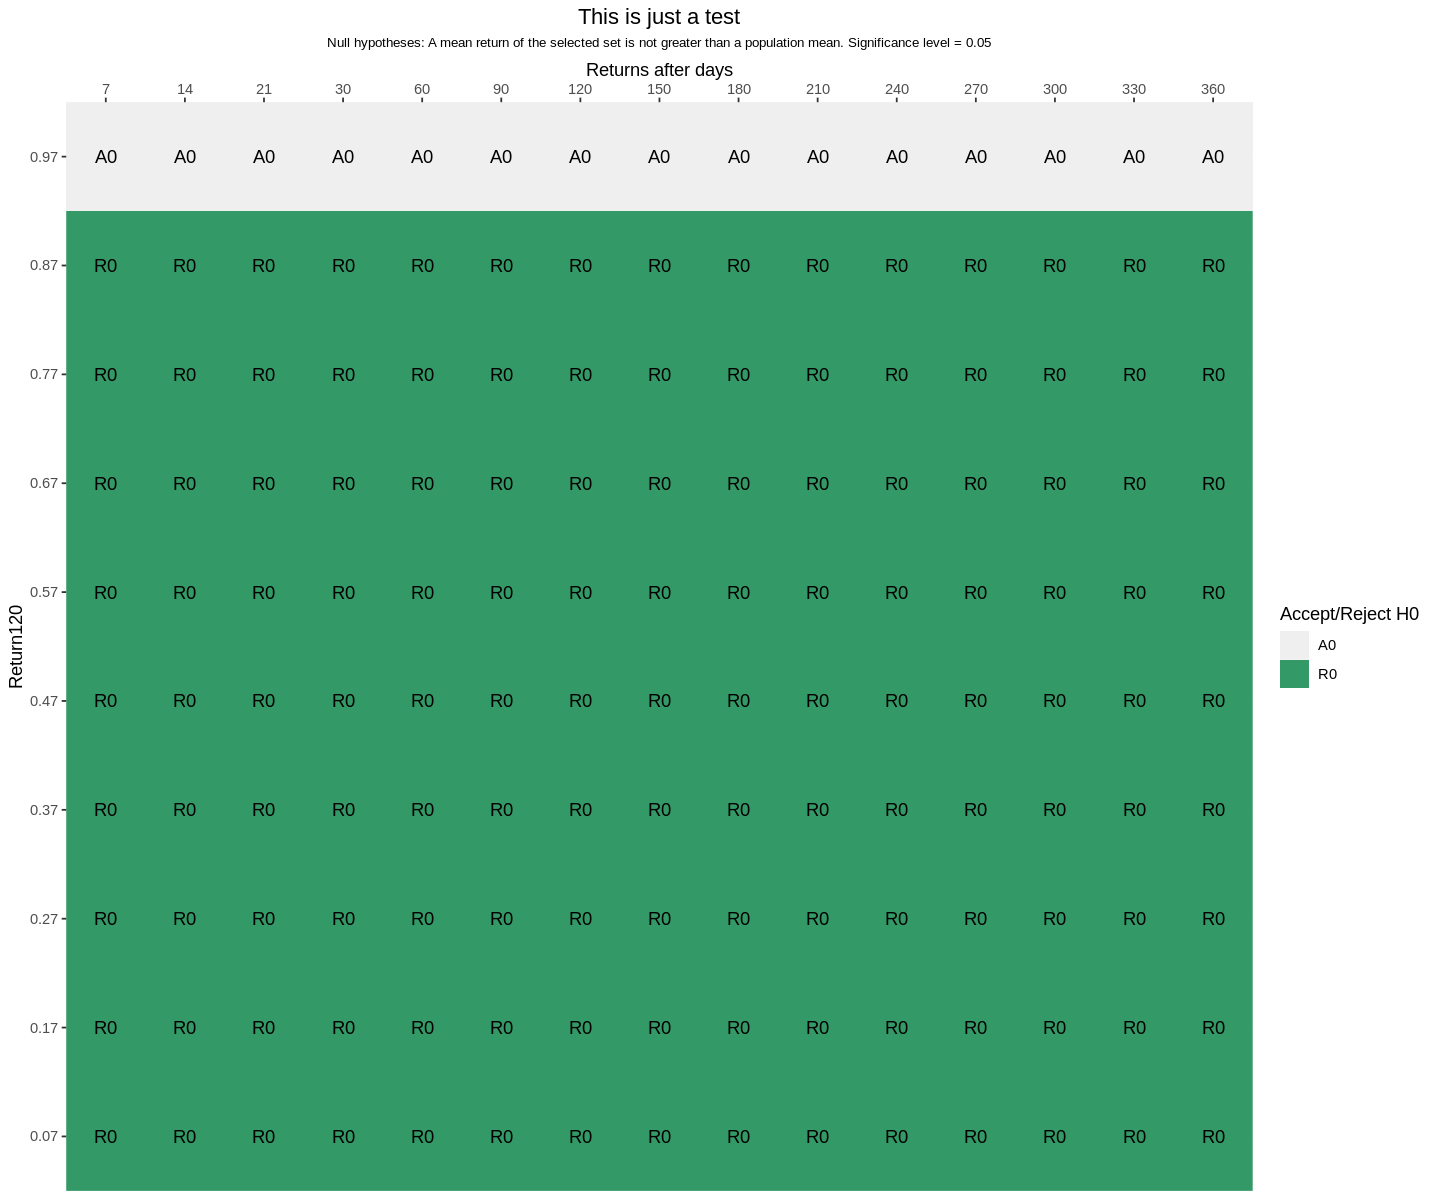

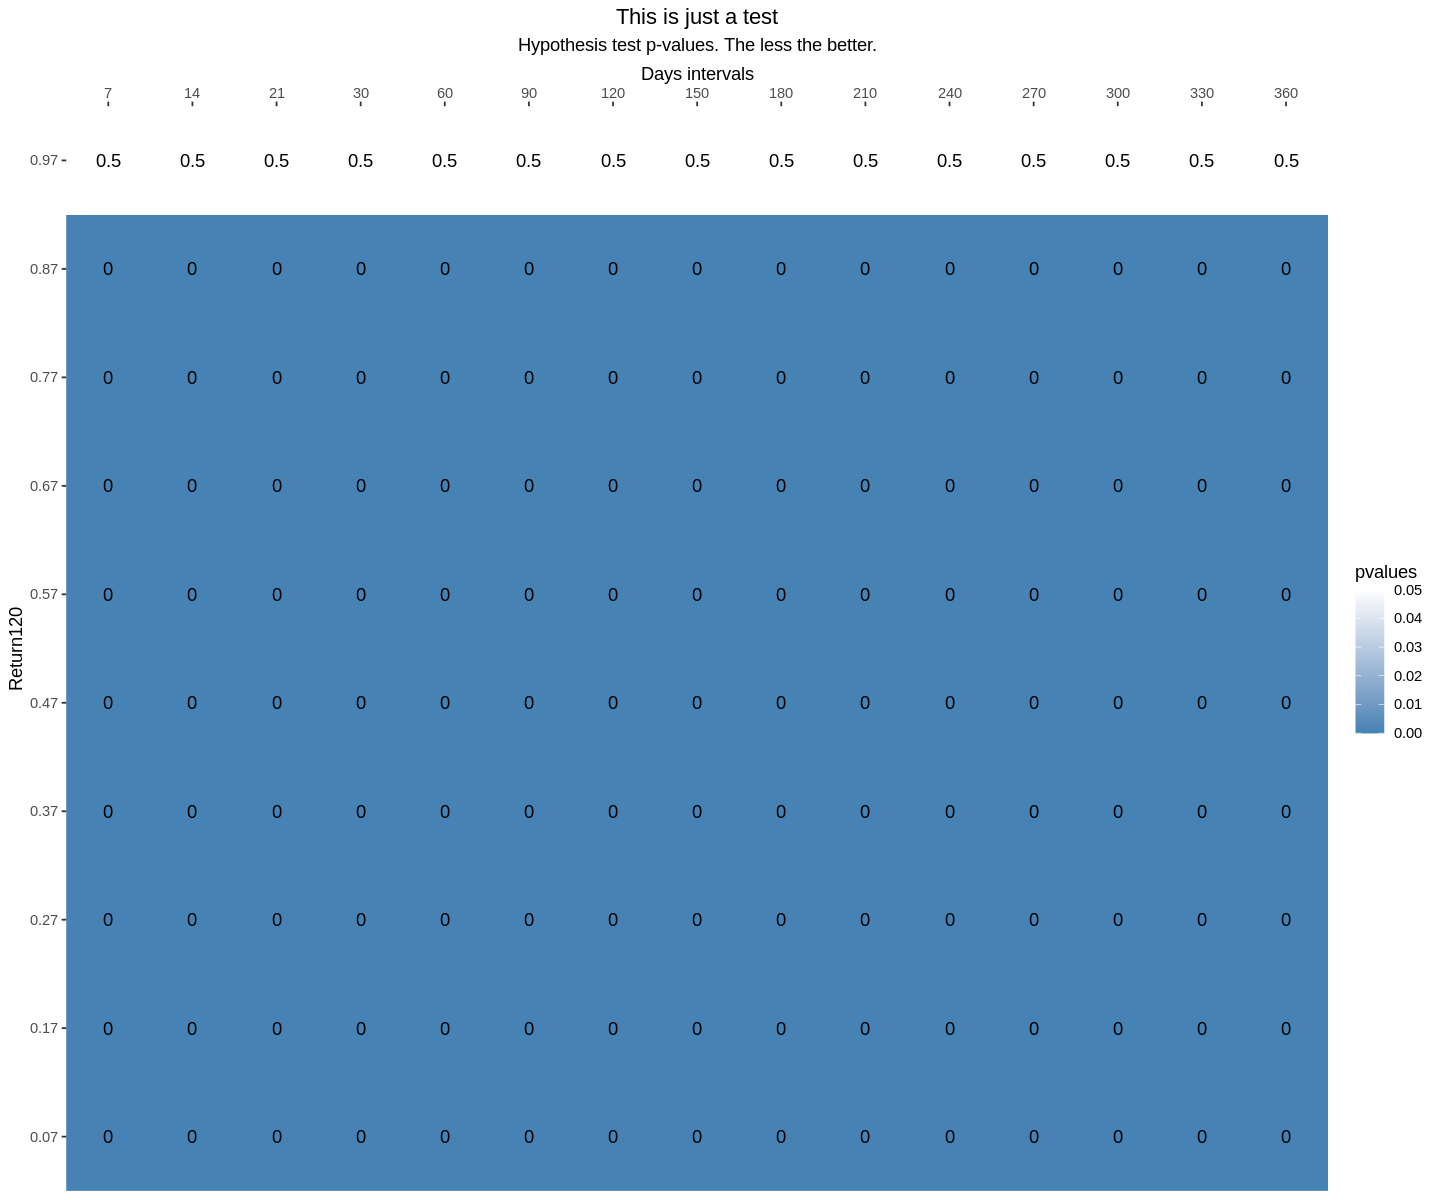

In [16]:
experiment = list(
  name = "Software test 01",
  description = "This is just a test",
  sqlText = sql, # the latest sql above
  attributeName = "Return120",
  attributeSteps = seq(from = 0.07, to = 1, by = 0.1),
  comparisonOperator = `>`)

result = makeExperiment(experiment)


Hypothesis test of sample standard deviation.

Alternative hypothesis: The sample standard deviation is less than the population SD.


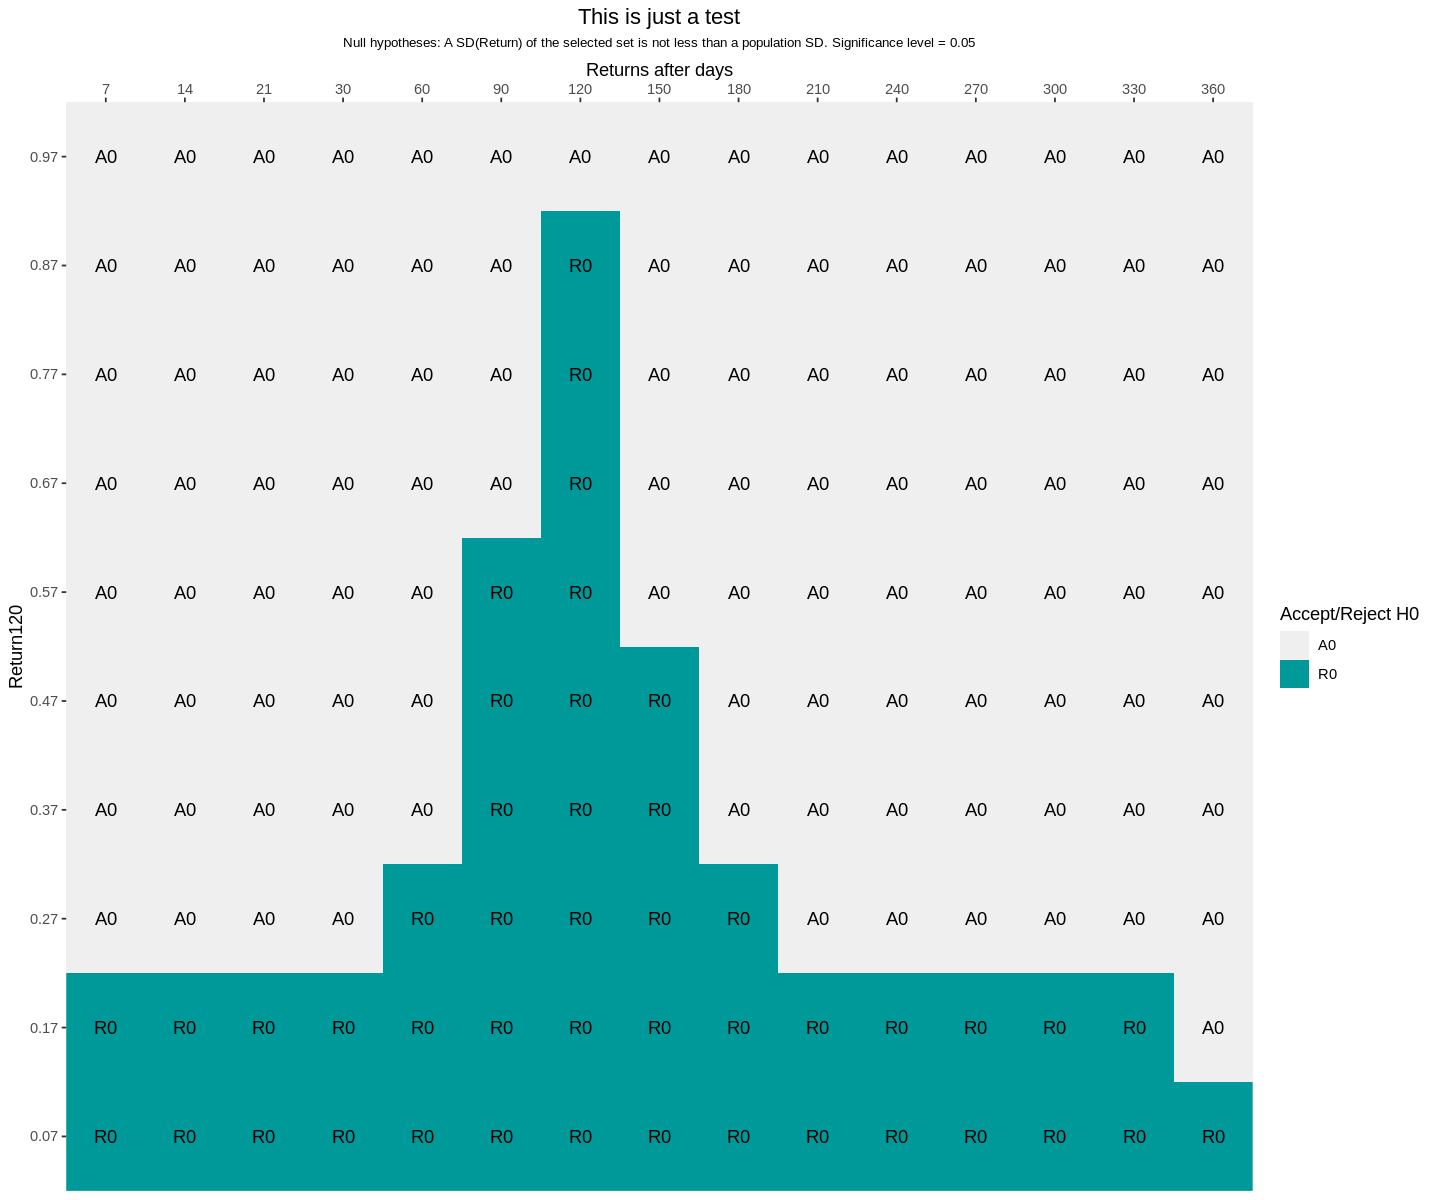

In [17]:
showSDLessHypothesisTest(experiment, result)

In [18]:
showObservationsCounts(experiment, result)


The following table contains numbers of observations in the used statistics intervals.
A number of observations in the sample is an important part of the hypothesis testing. Be careful if it is low (less than 30).
Numbers of observations shown in this table are NOT numbers of C2 strategies! Every strategy can have many observations in any statistics interval. That is what is shown here.


Selection,Obs007,Obs014,Obs021,Obs030,Obs060,Obs090,Obs120,Obs150,Obs180,Obs210,Obs240,Obs270,Obs300,Obs330,Obs360
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.87 <= Return120 < 0.97,519,519,519,519,519,519,519,461,408,334,289,261,251,220,171
0.77 <= Return120 < 0.87,724,724,724,724,724,724,724,659,573,475,417,362,346,300,239
0.67 <= Return120 < 0.77,1205,1205,1205,1205,1205,1205,1205,1095,928,790,708,630,568,485,403
0.57 <= Return120 < 0.67,2424,2424,2424,2424,2424,2424,2424,2149,1791,1526,1358,1116,965,811,686
0.47 <= Return120 < 0.57,4144,4144,4144,4144,4144,4144,4144,3691,3119,2668,2306,2097,1880,1697,1475
0.37 <= Return120 < 0.47,6702,6702,6702,6702,6702,6702,6702,6008,5306,4714,4174,3773,3430,3015,2639
0.27 <= Return120 < 0.37,13769,13769,13769,13769,13769,13769,13769,12461,11072,9945,8877,7943,7189,6528,5692
0.17 <= Return120 < 0.27,28912,28912,28912,28912,28912,28912,28912,26343,23652,21198,19253,17461,15787,14115,12314
0.07 <= Return120 < 0.17,61570,61570,61570,61570,61570,61570,61570,55334,50031,44918,40267,36108,32299,28713,25451



SampleMetricValue minus PopulationMetricValue

This table shows differences between metric values calculated for the whole population and the current sample metric values. (See the chapter 'Population statistics'.)
This is different from our hypothesis test. Our hypothesis test tests an (alternative) hypothesis 'Is a mean of the sample greater than a mean of the population?'
But our metric is 'Mean divided by SD'. So the standard deviation plays a role in it.
Our metric is greater when a numerator is greater and/or denominator is less. It is up to you what you prefer.



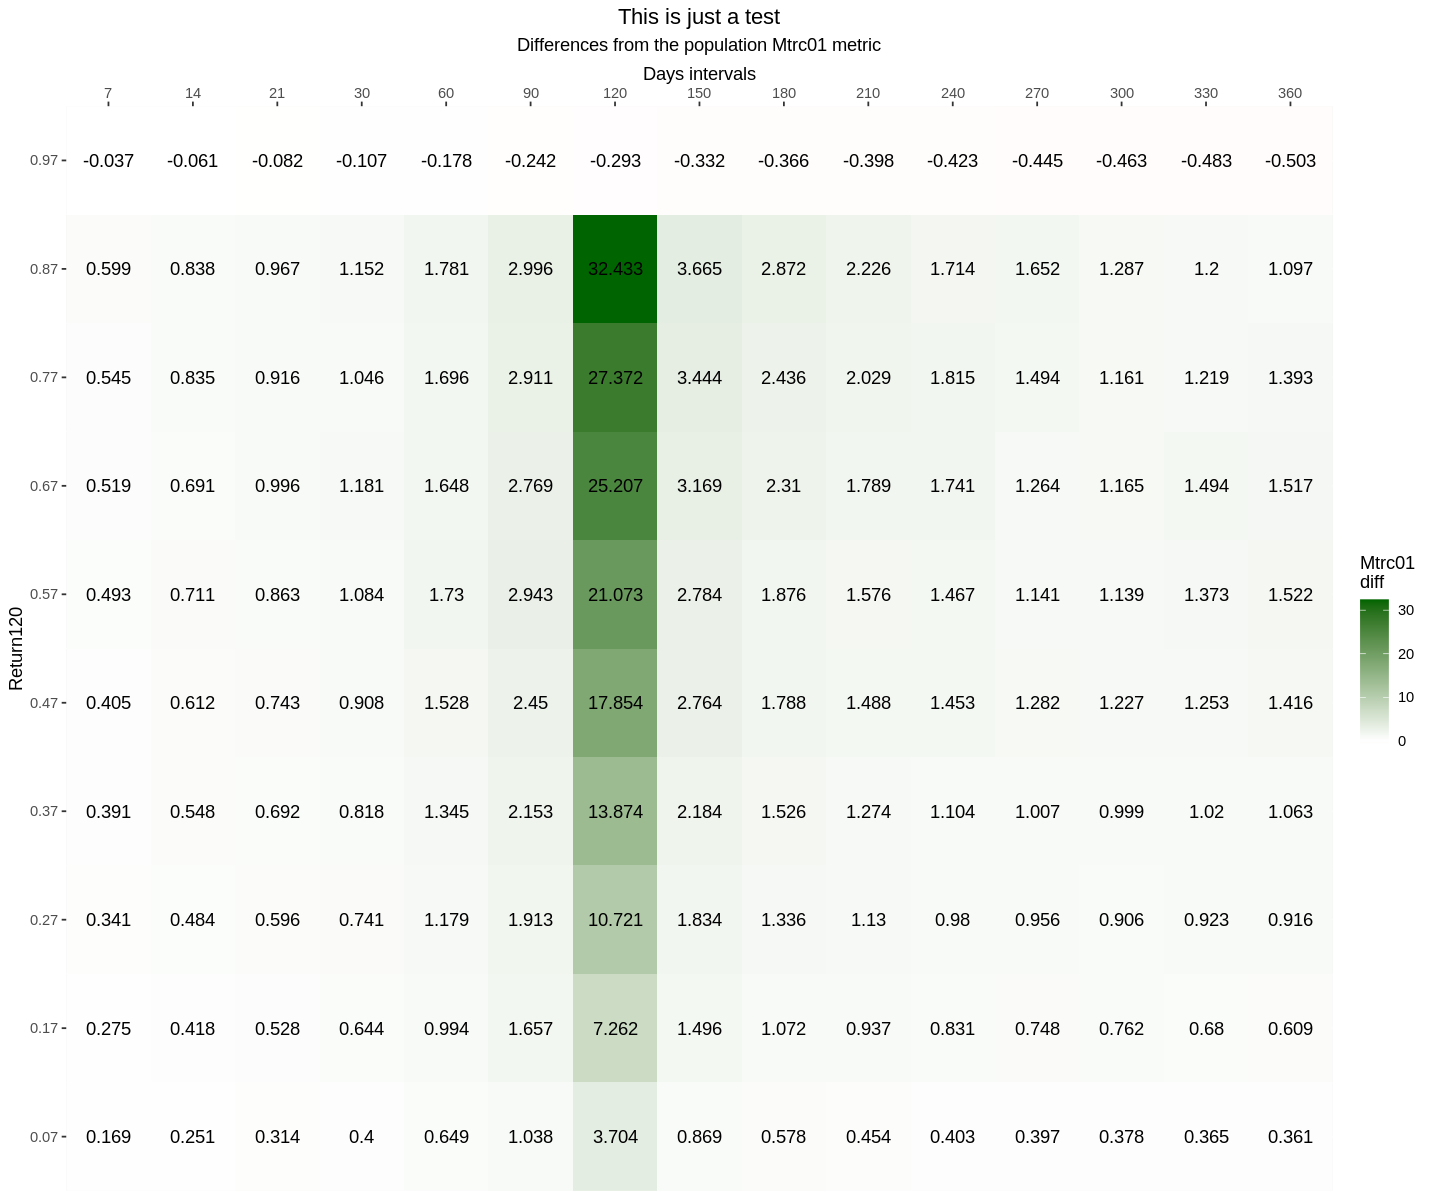

In [19]:
showMetricDifferences(experiment, result)

In [20]:
showSystemsCounts(experiment, result) 



Numbers of strategies observed in defined intervals.

Selection,Sys007,Sys014,Sys021,Sys030,Sys060,Sys090,Sys120,Sys150,Sys180,Sys210,Sys240,Sys270,Sys300,Sys330,Sys360
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.87 <= Return120 < 0.97,63,63,63,63,63,63,63,53,46,40,36,31,29,28,23
0.77 <= Return120 < 0.87,89,89,89,89,89,89,89,81,70,63,55,47,44,42,33
0.67 <= Return120 < 0.77,134,134,134,134,134,134,134,119,101,88,75,67,61,56,47
0.57 <= Return120 < 0.67,207,207,207,207,207,207,207,184,156,135,116,102,95,83,68
0.47 <= Return120 < 0.57,262,262,262,262,262,262,262,234,200,178,153,137,128,117,100
0.37 <= Return120 < 0.47,366,366,366,366,366,366,366,323,284,249,217,194,177,166,145
0.27 <= Return120 < 0.37,556,556,556,556,556,556,556,486,418,362,323,291,261,239,212
0.17 <= Return120 < 0.27,744,744,744,744,744,744,744,654,565,497,443,392,354,322,280
0.07 <= Return120 < 0.17,1022,1022,1022,1022,1022,1022,1022,847,734,647,572,496,440,395,347


### Discussion

Software works

## Age > 180

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
         654       83213      0.0700      0.1070      0.1603      0.2048      0.2521      0.9990      0.1403 


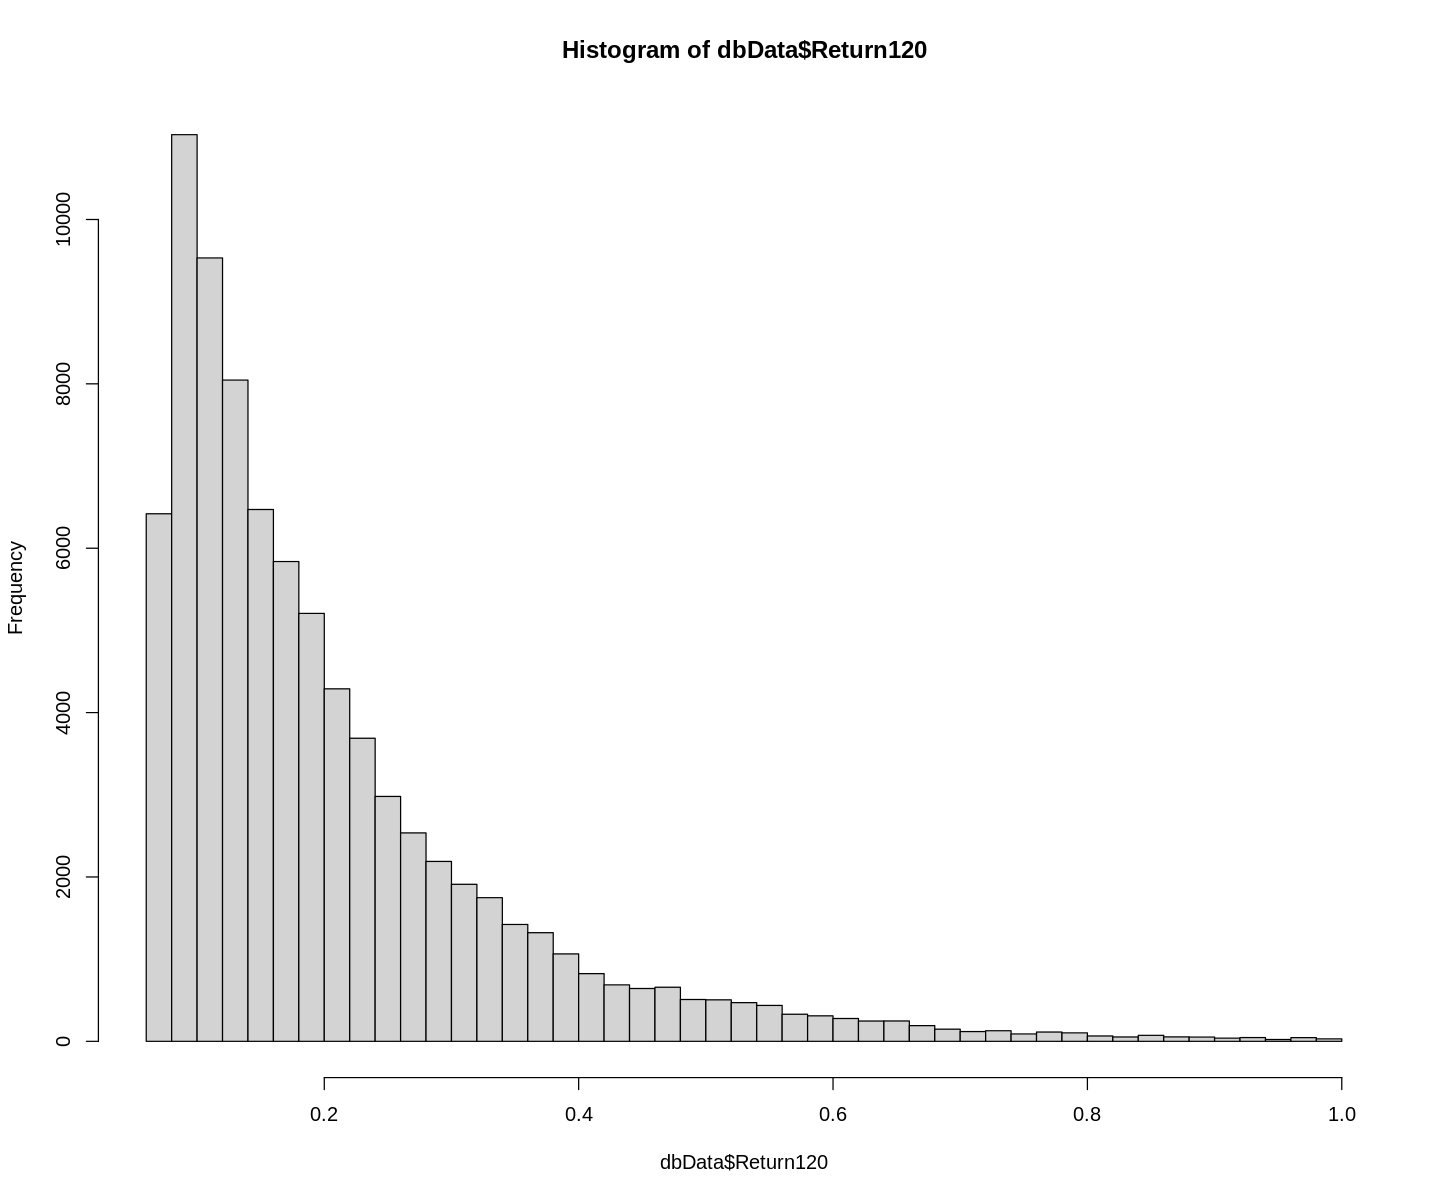

In [21]:
sql = "select * from ReturnsDataInIntervalsCleaned where Return120 > 0.07 and  Return120 < 1 and Age > 90"
dbData = getC2ScoreDbData(sql)
overview(dbData,"Return120")
hist(dbData$Return120,breaks=50)



We have calculated and stored the whole population statistics of strategies daily returns after 7, 14, ..., 360 days. Day after day. Now, we selected a particular statistics data (a sample) from the whole population. We want to know, if the average of returns of the sample is significantly higher than an average of returns of the whole population. A significance level is  0.05 .

The following table contains this hypothesis tests for defined stats intervals and all 7, 14, ..., 360 days time intervals.


Descriptive stats of all data selected in the experiment:
     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
         654       83213      0.0700      0.1070      0.1603      0.2048      0.2521      0.9990      0.1403 



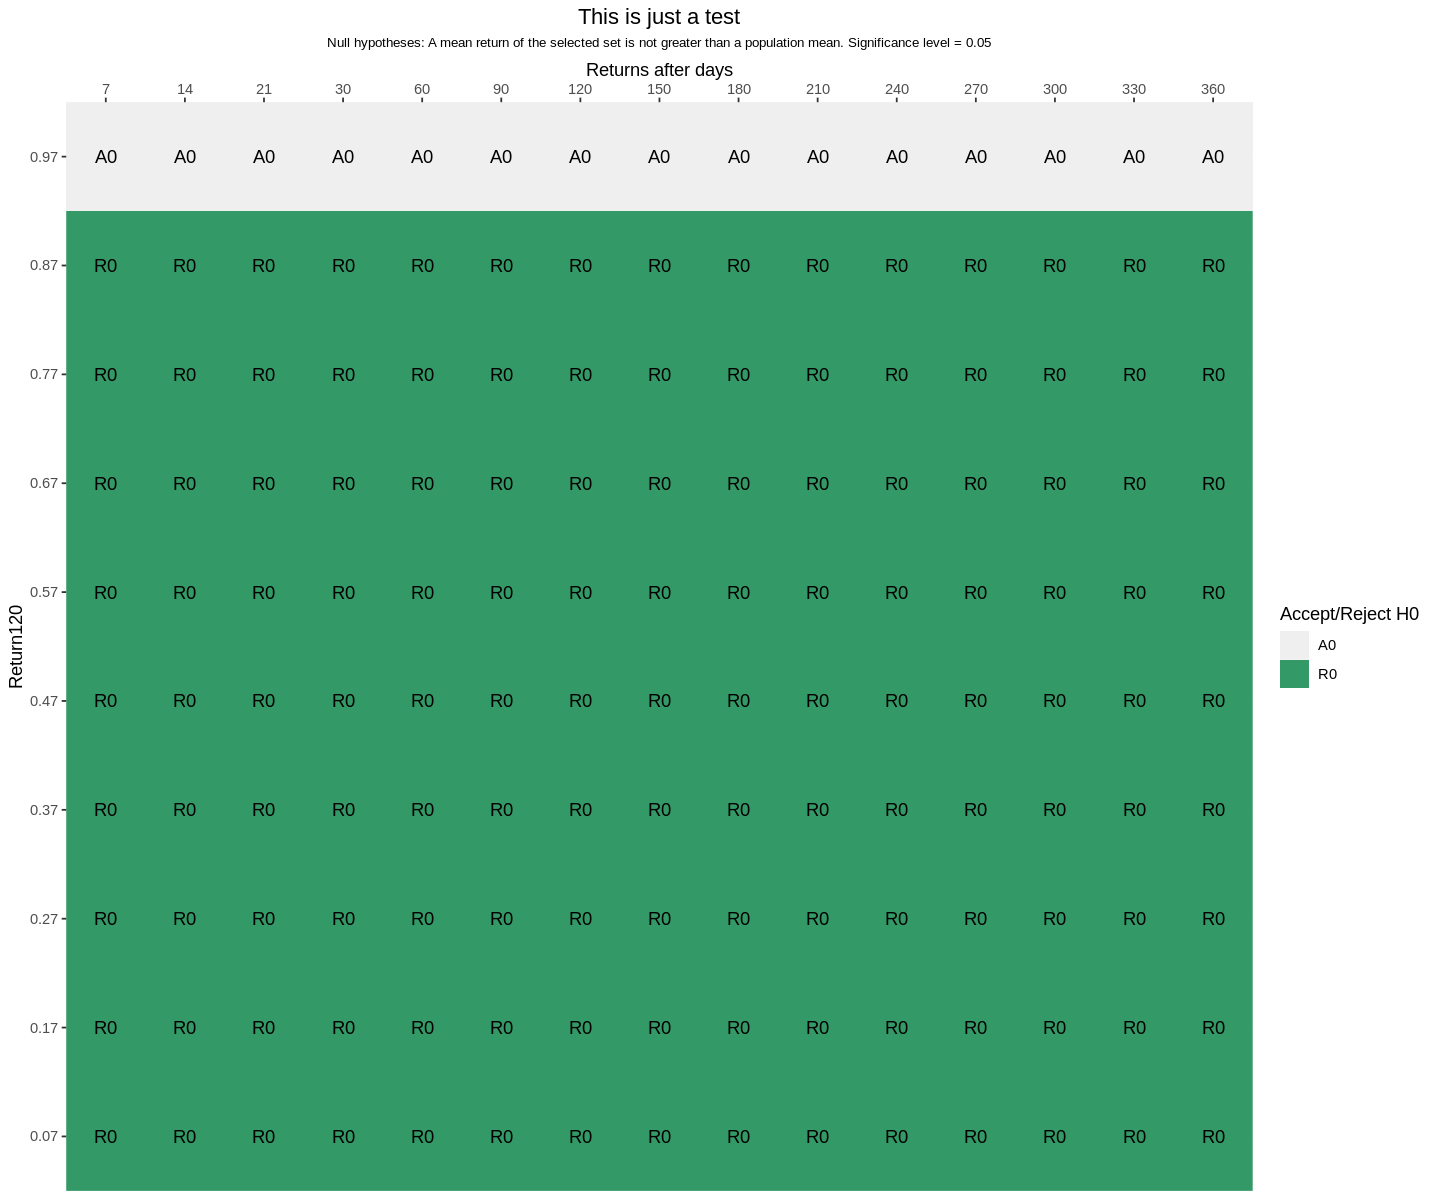

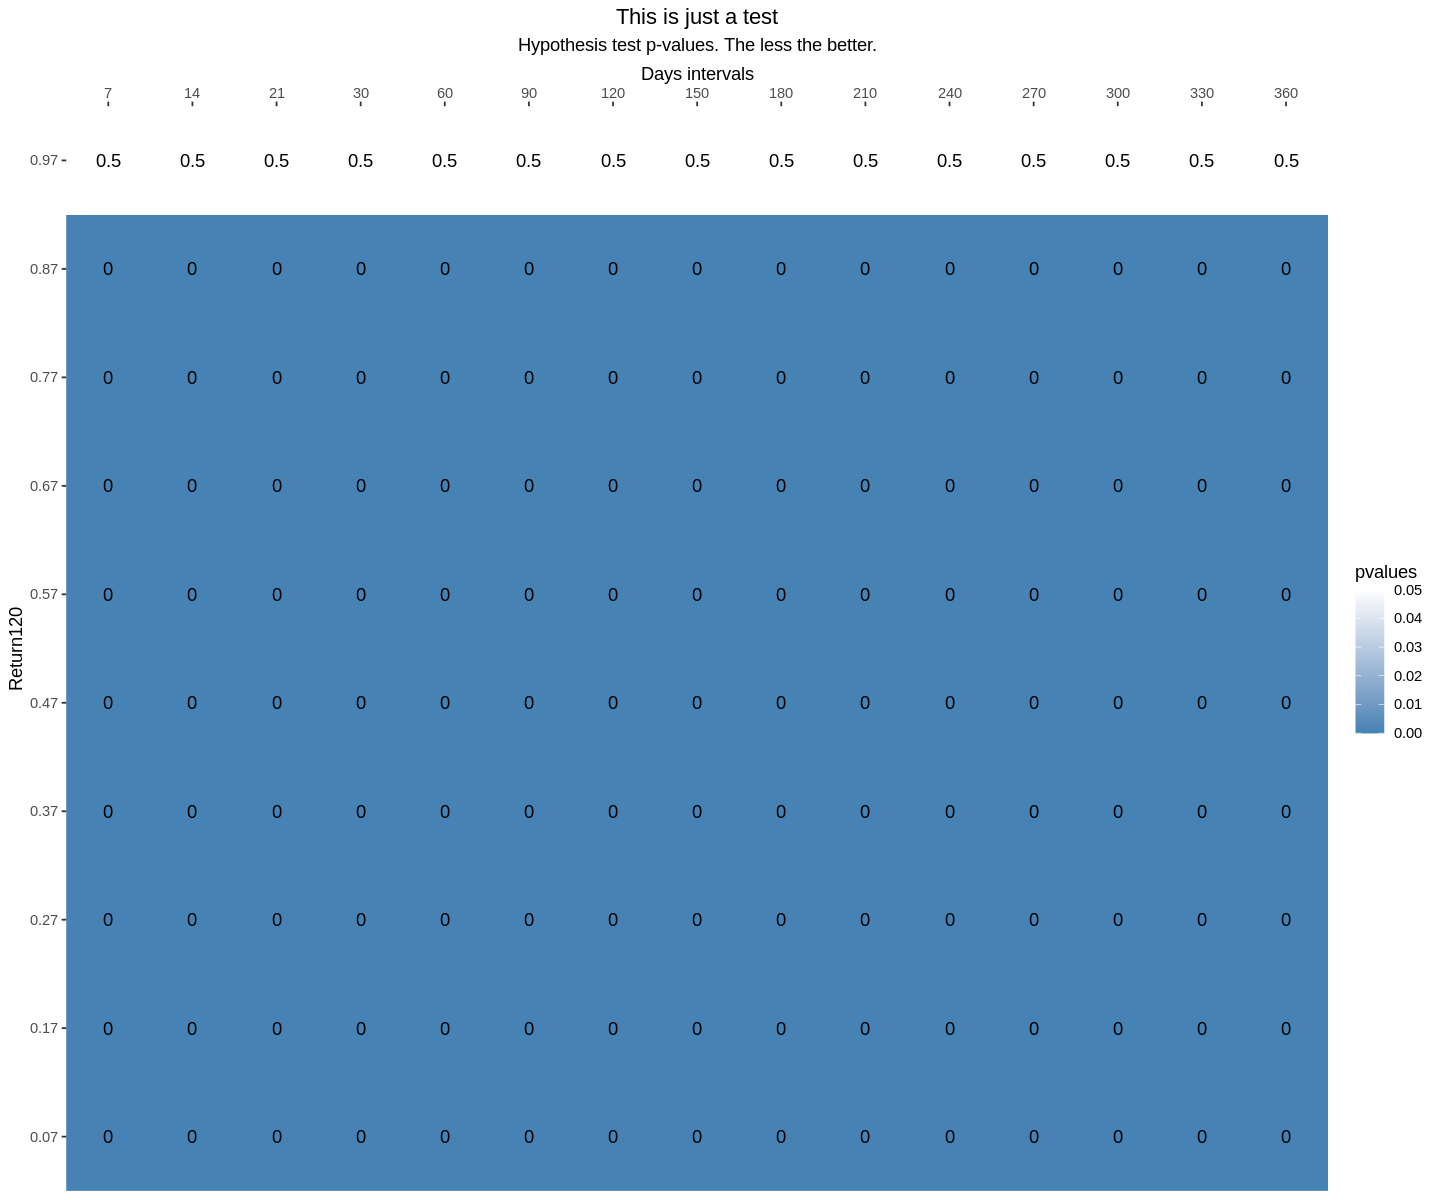

In [22]:
# Add  Age > 90
experiment = list(
  name = "Software test 02",
  description = "This is just a test",
  sqlText = sql, # the latest sql above
  attributeName = "Return120",
  attributeSteps = seq(from = 0.07, to = 1, by = 0.1),
  comparisonOperator = `>`)

result = makeExperiment(experiment)


Hypothesis test of sample standard deviation.

Alternative hypothesis: The sample standard deviation is less than the population SD.


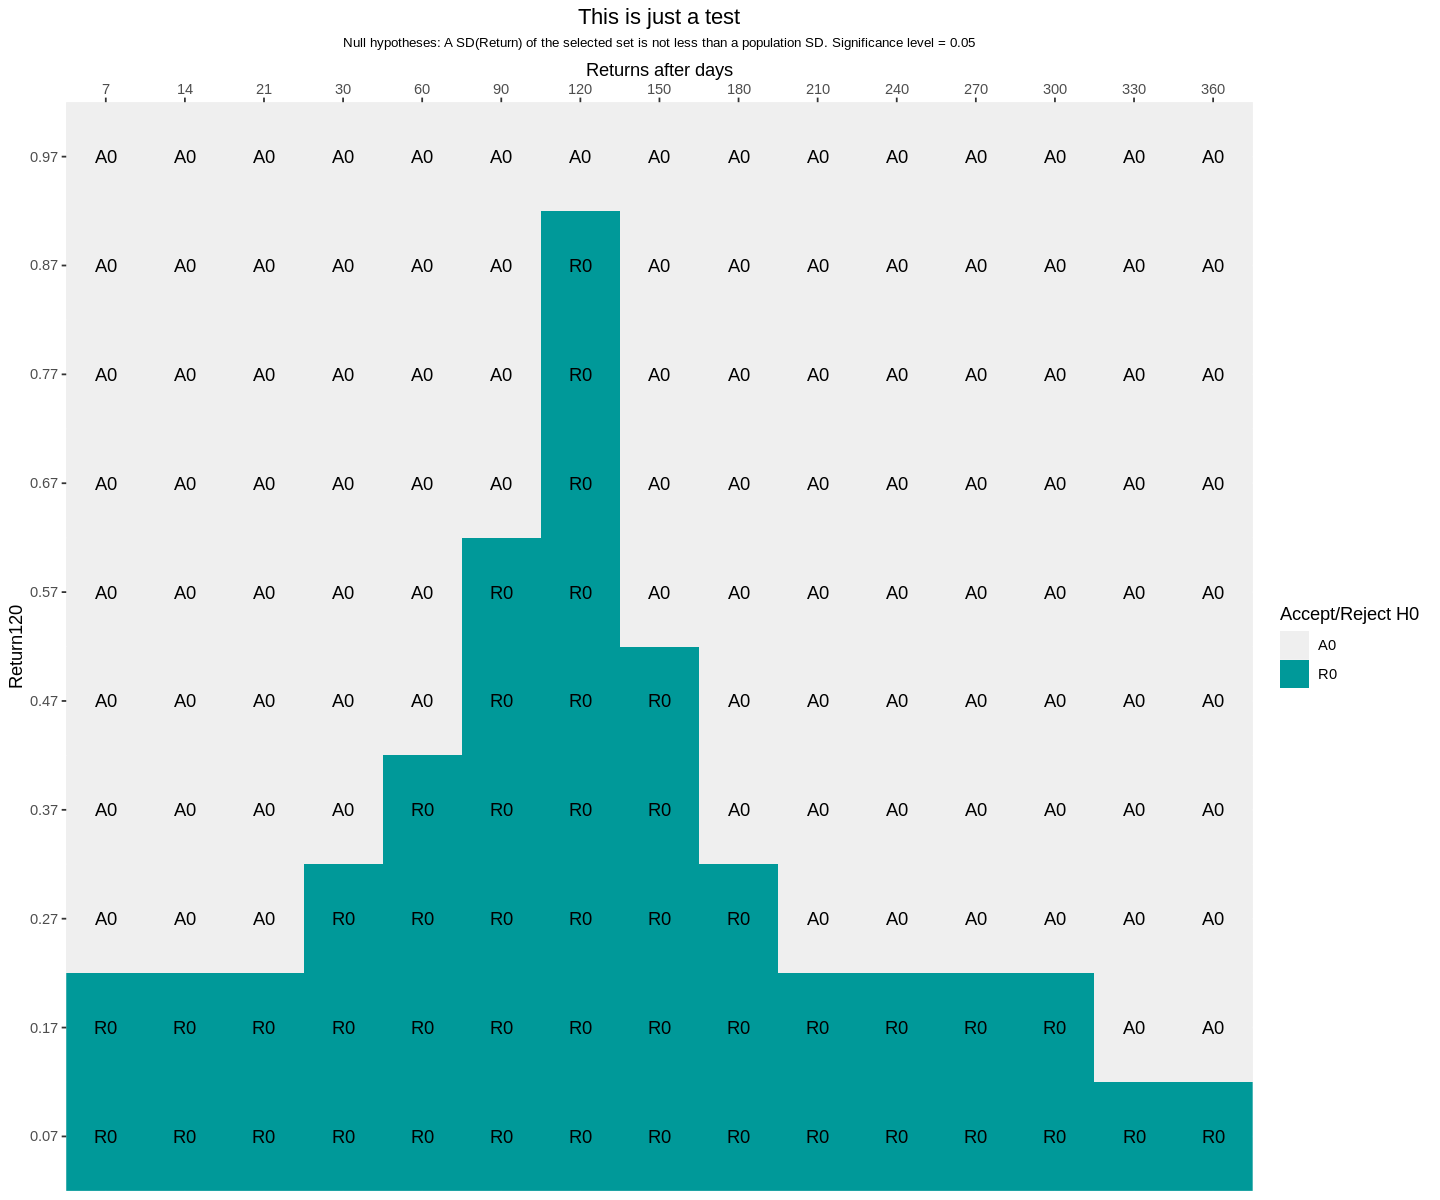

In [23]:
showSDLessHypothesisTest(experiment, result)

In [24]:
showObservationsCounts(experiment, result)


The following table contains numbers of observations in the used statistics intervals.
A number of observations in the sample is an important part of the hypothesis testing. Be careful if it is low (less than 30).
Numbers of observations shown in this table are NOT numbers of C2 strategies! Every strategy can have many observations in any statistics interval. That is what is shown here.


Selection,Obs007,Obs014,Obs021,Obs030,Obs060,Obs090,Obs120,Obs150,Obs180,Obs210,Obs240,Obs270,Obs300,Obs330,Obs360
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.87 <= Return120 < 0.97,196,196,196,196,196,196,196,168,131,114,112,108,103,93,81
0.77 <= Return120 < 0.87,391,391,391,391,391,391,391,359,299,250,237,208,201,175,139
0.67 <= Return120 < 0.77,618,618,618,618,618,618,618,574,489,399,363,299,274,249,219
0.57 <= Return120 < 0.67,1360,1360,1360,1360,1360,1360,1360,1234,1002,825,733,554,476,424,373
0.47 <= Return120 < 0.57,2383,2383,2383,2383,2383,2383,2383,2152,1839,1581,1351,1212,1061,945,818
0.37 <= Return120 < 0.47,4183,4183,4183,4183,4183,4183,4183,3809,3345,2939,2629,2375,2136,1849,1609
0.27 <= Return120 < 0.37,9176,9176,9176,9176,9176,9176,9176,8420,7517,6752,5993,5389,4860,4420,3889
0.17 <= Return120 < 0.27,20252,20252,20252,20252,20252,20252,20252,18740,16887,15188,13744,12519,11432,10301,9094
0.07 <= Return120 < 0.17,44590,44590,44590,44590,44590,44590,44590,40744,37319,33851,30646,27611,24920,22656,20299



SampleMetricValue minus PopulationMetricValue

This table shows differences between metric values calculated for the whole population and the current sample metric values. (See the chapter 'Population statistics'.)
This is different from our hypothesis test. Our hypothesis test tests an (alternative) hypothesis 'Is a mean of the sample greater than a mean of the population?'
But our metric is 'Mean divided by SD'. So the standard deviation plays a role in it.
Our metric is greater when a numerator is greater and/or denominator is less. It is up to you what you prefer.



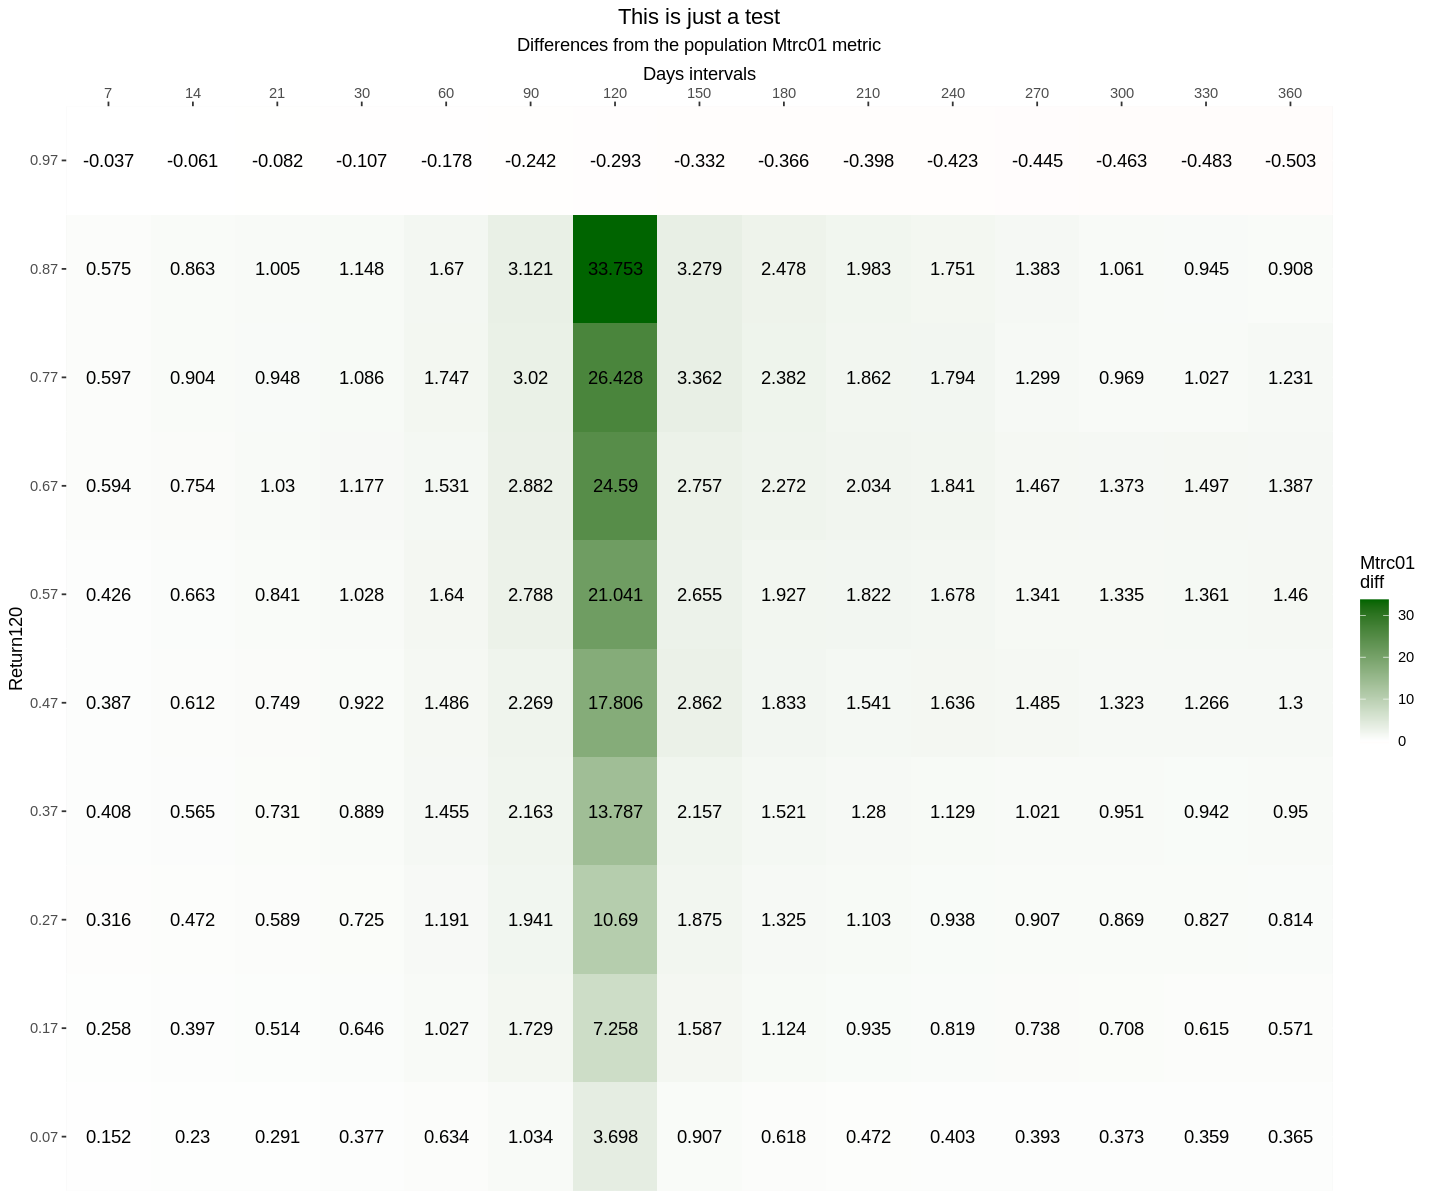

In [25]:
showMetricDifferences(experiment, result)

In [26]:
showSystemsCounts(experiment, result) 



Numbers of strategies observed in defined intervals.

Selection,Sys007,Sys014,Sys021,Sys030,Sys060,Sys090,Sys120,Sys150,Sys180,Sys210,Sys240,Sys270,Sys300,Sys330,Sys360
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.87 <= Return120 < 0.97,29,29,29,29,29,29,29,26,21,17,15,14,13,13,11
0.77 <= Return120 < 0.87,47,47,47,47,47,47,47,43,38,30,28,24,23,23,19
0.67 <= Return120 < 0.77,72,72,72,72,72,72,72,65,53,43,40,34,30,28,25
0.57 <= Return120 < 0.67,106,106,106,106,106,106,106,100,85,71,65,56,50,42,38
0.47 <= Return120 < 0.57,145,145,145,145,145,145,145,132,113,103,90,81,73,64,59
0.37 <= Return120 < 0.47,212,212,212,212,212,212,212,192,167,147,135,122,109,100,90
0.27 <= Return120 < 0.37,338,338,338,338,338,338,338,303,264,233,210,191,173,160,144
0.17 <= Return120 < 0.27,456,456,456,456,456,456,456,416,364,329,298,264,244,226,203
0.07 <= Return120 < 0.17,632,632,632,632,632,632,632,559,495,447,404,358,318,287,259


### Discussion

Software works